# Chargement des données 

In [1]:
from pyhive import hive
import pandas as pd

In [2]:
hive_host = 'localhost'
hive_port = 10000
hive_username = ' ' 
hive_password = ' '

In [3]:
try:
    # Établir une connexion avec authentification LDAP
    conn = hive.Connection(
        host=hive_host,
        port=hive_port,
        username=hive_username,
        password=hive_password,
        auth='LDAP'  
    )
    print("Connecté à Hive avec succès")
except Exception as e:
    print(f"Erreur lors de la connexion à Hive: {e}")

Connecté à Hive avec succès


In [4]:
# Créer un curseur
cursor=conn.cursor()

In [5]:
def findAll(table) :
    # Exécuter une requête pour récupérer les données de la table "catalogue"
    query = "SELECT * FROM " + table
    cursor.execute(query)

    # Charger les résultats dans un DataFrame Pandas
    data = cursor.fetchall()

    # Récupérer les noms des colonnes
    columns = [desc[0] for desc in cursor.description] 
    df = pd.DataFrame(data, columns=columns)
    print("Select all ", table)
    
    # Afficher les premières lignes du DataFrame
    print(df.head())

    return df

In [6]:
dfImmatriculation = findAll("immatriculation_ext")
dfMarketing = findAll("marketing_ext")
dfClients = findAll("clients_ext")

Select all  immatriculation_ext
  immatriculation_ext.immatriculation immatriculation_ext.marque  \
0                          3176 TS 67                    Renault   
1                          3721 QS 49                      Volvo   
2                          9099 UV 26                 Volkswagen   
3                          3563 LA 55                    Peugeot   
4                          6963 AX 34                       Audi   

  immatriculation_ext.nom  immatriculation_ext.puissance  \
0             Laguna 2.0T                            170   
1                  S80 T6                            272   
2            Golf 2.0 FSI                            150   
3                1007 1.4                             75   
4                  A2 1.4                             75   

  immatriculation_ext.longueur  immatriculation_ext.nbplaces  \
0                       longue                             5   
1                  très longue                             5   
2     

# 1. ANALYSE EXPLORATOIRE DES DONNEES
## Statistiques descriptives / vérification des valeurs

In [7]:
def descriptionDataframe(table, df) :
    # Affichage des statistiques descriptives
    print("Affichage des statistiques descriptives de ", table)
    print(df.describe())

    # Affichage des types de données et des valeurs manquantes
    print("Affichage des types de données et des valeurs manquantes  de ", table)
    print(df.info())

    # Vérification des valeurs manquantes
    print("Vérification des valeurs manquantes  de ", table)
    print(df.isnull().sum())
    
    # Vérification des doublons
    print("Vérification des doublons  de ", table)
    duplicates = df.duplicated()
    print(f"Nombre de doublons : {duplicates.sum()}")

In [8]:
descriptionDataframe("Immatriculation",dfImmatriculation)

Affichage des statistiques descriptives de  Immatriculation
       immatriculation_ext.puissance  immatriculation_ext.nbplaces  \
count                   2.000000e+06                     2000000.0   
mean                    1.990422e+02                           5.0   
std                     1.371486e+02                           0.0   
min                     5.500000e+01                           5.0   
25%                     7.500000e+01                           5.0   
50%                     1.500000e+02                           5.0   
75%                     2.450000e+02                           5.0   
max                     5.070000e+02                           5.0   

       immatriculation_ext.nbportes  immatriculation_ext.prix  
count                  2.000000e+06              2.000000e+06  
mean                   4.868432e+00              3.578257e+04  
std                    4.958084e-01              2.577564e+04  
min                    3.000000e+00              7.50

In [9]:
dfImmatriculation.drop_duplicates(inplace=True)
print(f"Nombre de doublons après suppression : {dfImmatriculation.duplicated().sum()}")

Nombre de doublons après suppression : 0


In [10]:
descriptionDataframe("Clients",dfClients)

Affichage des statistiques descriptives de  Clients
       clients_ext.id  clients_ext.age  clients_ext.taux  \
count   100000.000000    100000.000000     100000.000000   
mean     50000.500000        43.547190        607.934460   
std      28867.657797        18.460788        337.523089   
min          1.000000        -1.000000         -1.000000   
25%      25000.750000        27.000000        420.000000   
50%      50000.500000        41.000000        521.000000   
75%      75000.250000        56.000000        830.000000   
max     100000.000000        84.000000       1399.000000   

       clients_ext.nbenfantsacharge  
count                 100000.000000  
mean                       1.249220  
std                        1.390413  
min                       -1.000000  
25%                        0.000000  
50%                        1.000000  
75%                        2.000000  
max                        4.000000  
Affichage des types de données et des valeurs manquantes  de  Cli

In [11]:
descriptionDataframe("Marketing",dfMarketing)

Affichage des statistiques descriptives de  Marketing
       marketing_ext.id  marketing_ext.age  marketing_ext.taux  \
count          20.00000          20.000000           20.000000   
mean           10.50000          45.000000          582.400000   
std             5.91608          19.246326          345.656111   
min             1.00000          19.000000          153.000000   
25%             5.75000          26.750000          408.500000   
50%            10.50000          45.500000          527.000000   
75%            15.25000          59.000000          628.750000   
max            20.00000          80.000000         1396.000000   

       marketing_ext.nbenfantsacharge  
count                       20.000000  
mean                         0.950000  
std                          1.276302  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          2.000000  
max                          3.

# 4. Fusion des données Clients et Immatriculations

In [12]:
# Fusionner les deux DataFrames sur la colonne 'immatriculation'
dfClientImmatriculation = pd.merge(dfClients, dfImmatriculation, how='inner', left_on='clients_ext.immatriculation', right_on='immatriculation_ext.immatriculation')
print("Fusion done")

# Afficher les premières lignes du DataFrame fusionné
print(dfClientImmatriculation.head())

Fusion done
   clients_ext.id  clients_ext.age clients_ext.sexe  clients_ext.taux  \
0               2               77                M               971   
1              13               53                M               237   
2              13               53                M               237   
3              18               84                M               402   
4              26               47                M               213   

  clients_ext.situationfamiliale  clients_ext.nbenfantsacharge  \
0                      En Couple                             2   
1                      En Couple                             1   
2                      En Couple                             1   
3                    Célibataire                             0   
4                      En Couple                             0   

   clients_ext.deuxiemevoiture clients_ext.immatriculation  \
0                        False                  3533 DC 75   
1                        Fal

In [13]:
descriptionDataframe("ClientImmatriculation",dfClientImmatriculation)

Affichage des statistiques descriptives de  ClientImmatriculation
       clients_ext.id  clients_ext.age  clients_ext.taux  \
count   100306.000000    100306.000000     100306.000000   
mean     49988.952934        43.545381        607.978785   
std      28869.199235        18.459213        337.528035   
min          1.000000        -1.000000         -1.000000   
25%      24985.250000        27.000000        420.000000   
50%      49982.500000        41.000000        521.000000   
75%      74992.750000        56.000000        831.000000   
max     100000.000000        84.000000       1399.000000   

       clients_ext.nbenfantsacharge  immatriculation_ext.puissance  \
count                 100306.000000                  100306.000000   
mean                       1.249168                     199.289534   
std                        1.390453                     137.177224   
min                       -1.000000                      55.000000   
25%                        0.000000        

## Histogramme / Nuage de points / Matrice de corelaton

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-injr3tqd because the default path (/home/vagrant/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [19]:
df = dfClientImmatriculation.copy()

In [36]:
# Sélection distincte de la colonne 'A'
distinct_values = dfImmatriculation['immatriculation_ext.nbplaces'].unique()
print("situationfamiliale : ",distinct_values)

situationfamiliale :  [5]


In [35]:
distinct_values = dfClientImmatriculation['clients_ext.situationfamiliale'].unique()
print("situationfamiliale : ",distinct_values)

situationfamiliale :  ['En Couple' 'Célibataire' 'Marié(e)' 'Seule' '' '?' 'Seul' 'N/D'
 'Divorcée']


In [20]:
# Exclure les colonnes non numériques spécifiées
df['clients_ext.sexe'] = df['clients_ext.sexe'].map({'M': 0, 'F': 1})
df['clients_ext.situationfamiliale'] = df['clients_ext.situationfamiliale'].map(
    {
        '?': -1, 'N/D': -1, '': -1,
        'Célibataire': 0, 'Seule': 0, 'Seul': 0,
        'En Couple': 1, 
        'Marié(e)': 2, 
        'Divorcée': 2, 
    }
)
df['immatriculation_ext.longueur'] = df['immatriculation_ext.longueur'].map({'très longue': 3, 'longue': 2, 'moyenne': 1, 'courte': 0})

In [37]:
# Calcul de la matrice de corrélation
corr_matrix = df[[
    'clients_ext.situationfamiliale', 
    'clients_ext.nbenfantsacharge', 
    'immatriculation_ext.puissance', 
    'immatriculation_ext.longueur',
    'immatriculation_ext.nbportes',
    'immatriculation_ext.prix',
]].corr()
print(corr_matrix)

                                clients_ext.situationfamiliale  \
clients_ext.situationfamiliale                        1.000000   
clients_ext.nbenfantsacharge                          0.493493   
immatriculation_ext.puissance                         0.433144   
immatriculation_ext.longueur                          0.595398   
immatriculation_ext.nbportes                          0.153998   
immatriculation_ext.prix                              0.424973   

                                clients_ext.nbenfantsacharge  \
clients_ext.situationfamiliale                      0.493493   
clients_ext.nbenfantsacharge                        1.000000   
immatriculation_ext.puissance                       0.574580   
immatriculation_ext.longueur                        0.646134   
immatriculation_ext.nbportes                        0.170195   
immatriculation_ext.prix                            0.569336   

                                immatriculation_ext.puissance  \
clients_ext.situationfa

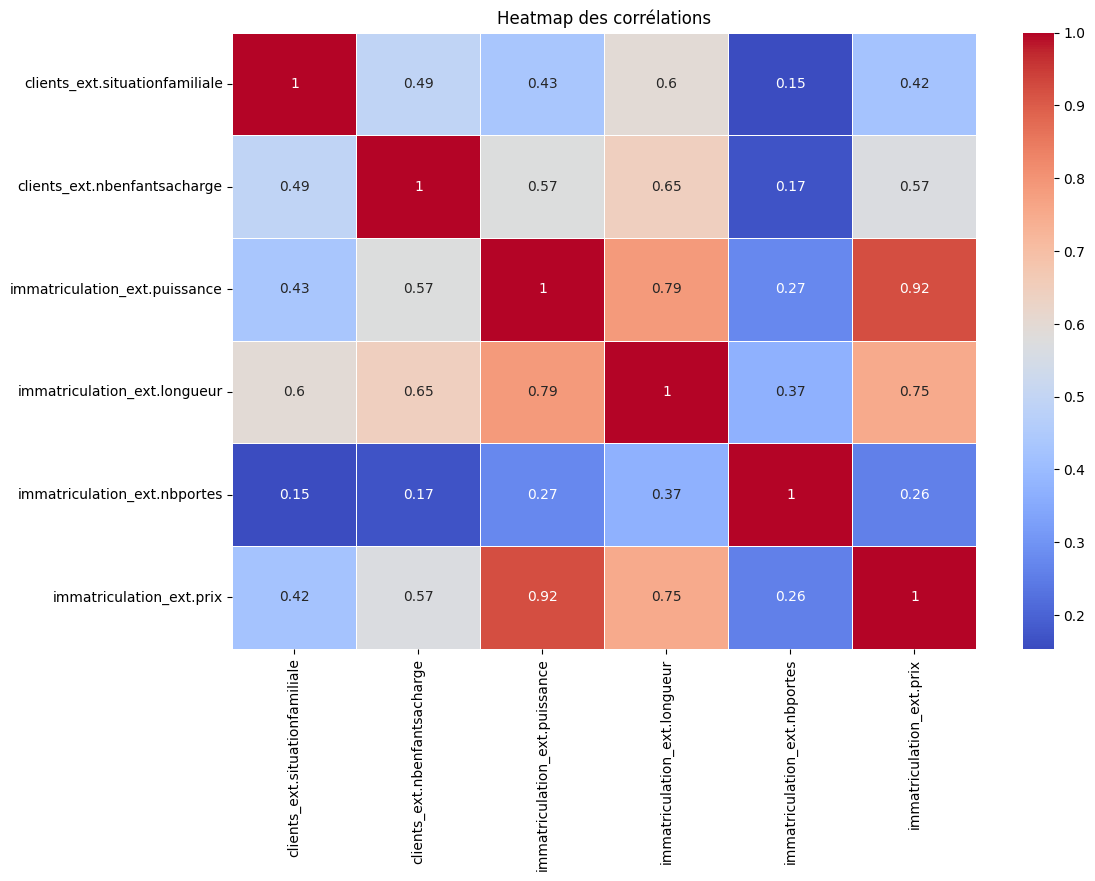

In [38]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()

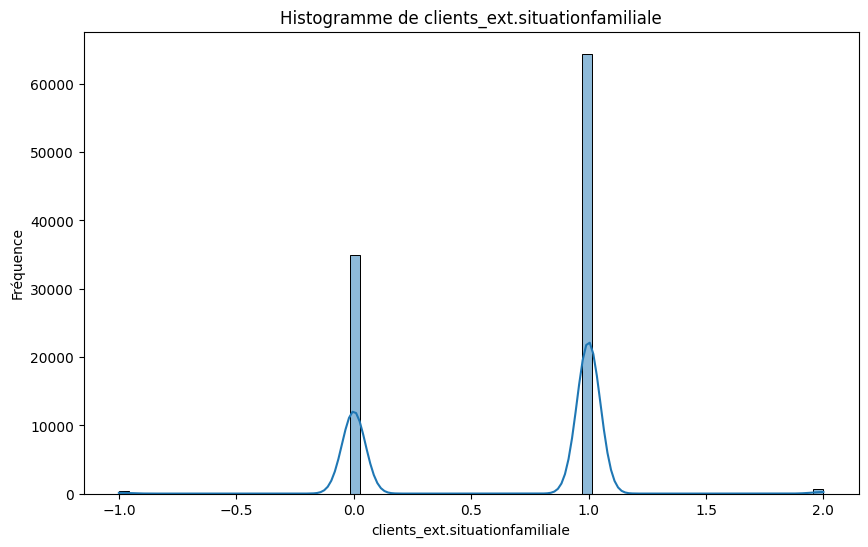

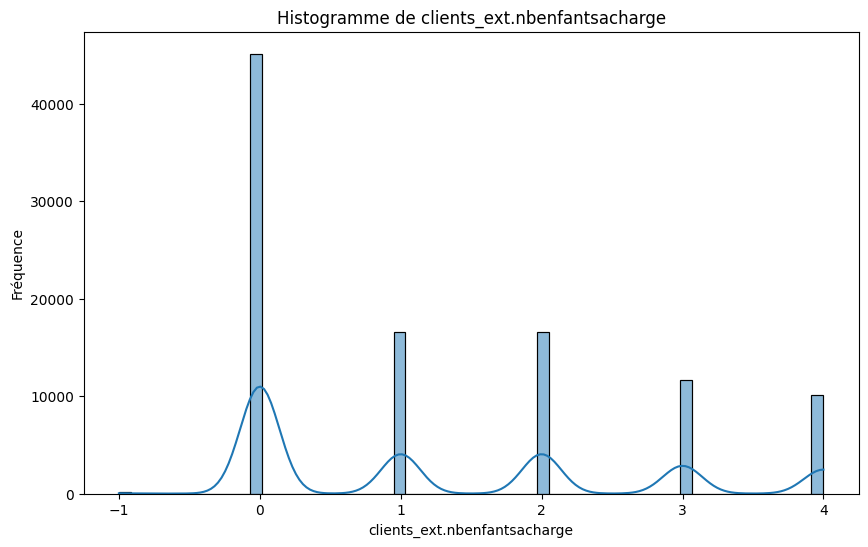

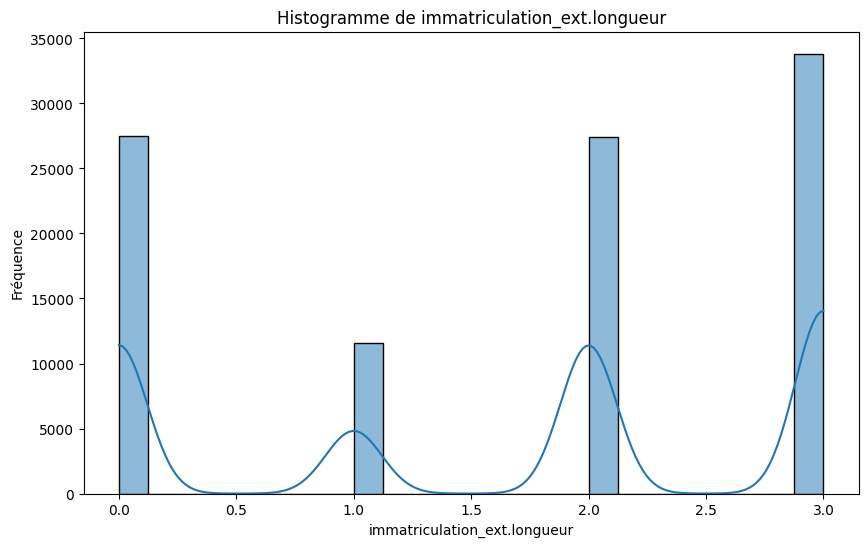

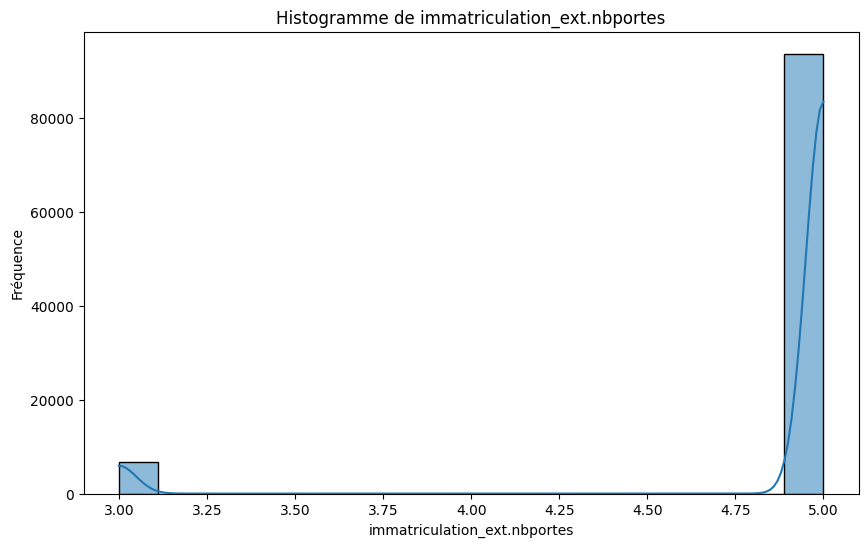

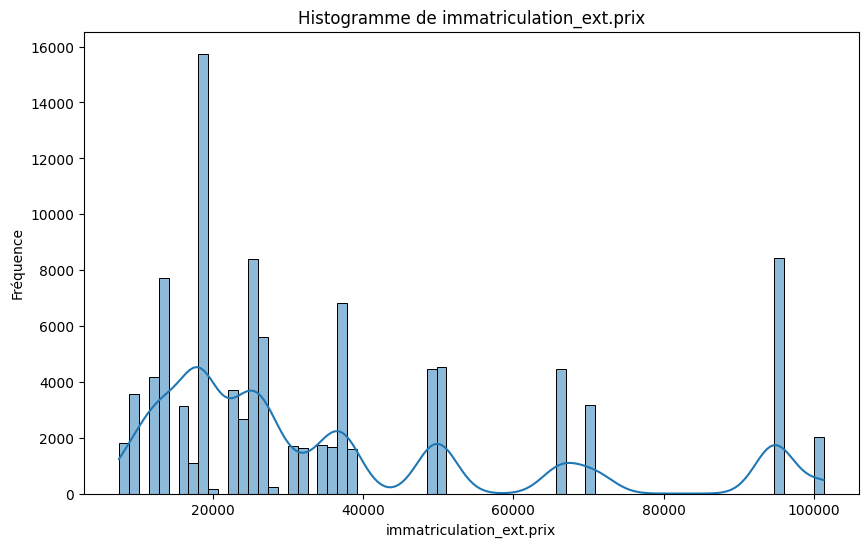

In [39]:
# Affichage des histogrammes pour les colonnes numériques
for col in [
    'clients_ext.situationfamiliale', 
    'clients_ext.nbenfantsacharge',
    'immatriculation_ext.longueur',
    'immatriculation_ext.nbportes', 
    'immatriculation_ext.prix'
    ]:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()